### Imports

In [11]:
%run utils.py

### Data

In [2]:
with open('data/training_instances_all.pkl', 'rb') as file: 
    train_inst = pkl.load(file)

with open('data/test_instance_type_1.pkl', 'rb') as file: 
    test_1 = pkl.load(file)
    
with open('data/test_equal_instances.pkl', 'rb') as file: 
    test_2 = pkl.load(file)

### Train Models

In [ ]:
f1_list, auc_list, aup_list, auc_list, ratio_list = train_set_cover(train_instances = train_inst,
                                                        epochs = 200,
                                                        patience = 100,
                                                        cost_type = 'equal',
                                                        model_path = None,
                                                        model_name = './models/set_cover_sage', 
                                                        m_type = 'sage',
                                                        feats = ['costs', 'cover', 'ppr', 'bi_sf', 'hyp_feat'])

f1_list, auc_list, aup_list, auc_list, ratio_list = train_set_cover(train_instances = train_inst,
                                                        epochs = 200,
                                                        patience = 100,
                                                        cost_type = 'length',
                                                        model_path = './models/set_cover_sage.pkl',
                                                        model_name = './models/set_cover_sage', 
                                                        m_type = 'sage',
                                                        feats = ['costs', 'cover', 'ppr', 'bi_sf', 'hyp_feat'])
f1_list, auc_list, aup_list, auc_list, ratio_list = train_set_cover(train_instances = train_inst,
                                                        epochs = 200,
                                                        patience = 100,
                                                        cost_type = 'length',
                                                        model_path = './models/set_cover_sage.pkl',
                                                        model_name = './models/set_cover_sage', 
                                                        m_type = 'sage',
                                                        feats = ['costs', 'cover', 'ppr', 'bi_sf', 'hyp_feat'])


### Custom SCP Instances

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-16
Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600
Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 14 rows, 5 columns and 28 nonzeros
Model fingerprint: 0x6777a76e
Variable types: 0 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 2.0000000
Variable types: 0 continuous, 5 integer (5 binary)

Root relaxation: cutoff, 3 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   

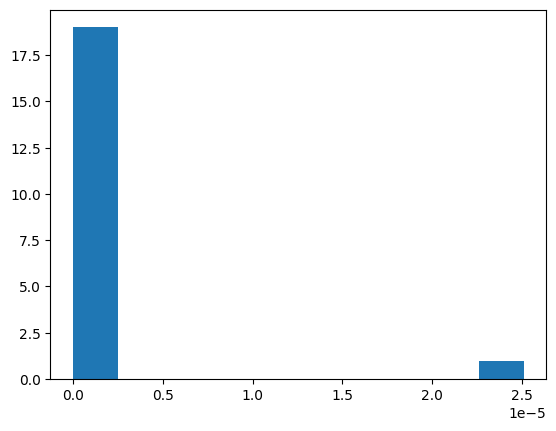

Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 14 rows, 3 columns and 22 nonzeros
Model fingerprint: 0x0926d83c
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded user MIP start with objective 3

Variable types: 0 continuous, 3 integer (3 binary)
Found heuristic solution: objective 2.0000000

Root relaxation: cutoff, 0 iterations, 0.00 seconds (0.00 work units)

Explored 1 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 10 (of 10 available processors)

Solution count 2: 2 3 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.000000000000e+00, best bound 2.000000000000e

In [3]:
# Simple test instance 

inst = {}
inst['universe'] = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
inst['subsets'] = {
                   0 : {1, 2}, 
                   1 : {3, 4, 5, 6}, 
                   2 : {7, 8, 9, 10, 11, 12, 13, 14}, 
                   4 : {1, 3, 4, 7, 8, 9, 10}, 
                   5 : {2, 5, 6, 11, 12, 13, 14},
                  }
inst['solutions'] = [['4', '5']]

results, inst = test_set_cover(test_instances = [inst],
                                 num_runs = 10,
                                 cost_type = 'equal',
                                 model_path = './models/set_cover_sage_hyp.pkl',
                                 m_type = 'sage',
                                 feats = ['costs', 'cover', 'ppr', 'bi_sf', 'hyp_feat'],
                                 init_sol_perc = 85,
                                 perc_start = 85,
                                 dec_size = 20, 
                                 obj_threshold = 1, 
                                 time_limit = 3600, 
                                 run_random = False, 
                                 gnn_solver = 'gurobi')

### Larger SCP instances using SCIP

Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600


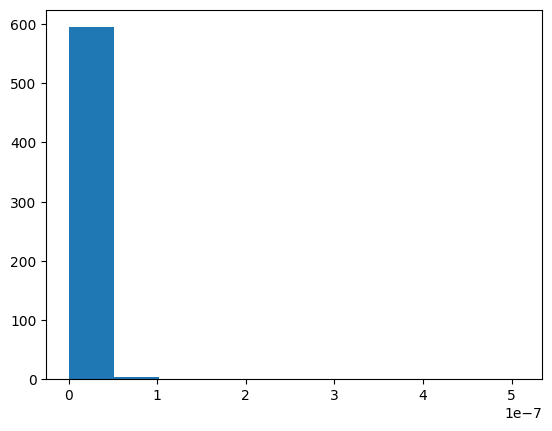

#########################################
Graph-SCP Time:  61.493338108062744
Random Time: 0 0 0
SCIP Time: 403.62698197364807
Greedy Time: 0.015006780624389648

Optimal Objective:  8
SCIP Objective:  8
Random Objective:  0 0 0

Gurobi Node Count :  158603
SCIP Node Count :  57399

Num Times Gurobi Run :  1
Problem Size :  120 / 350
#########################################
################################
#############0/5################
################################
Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600


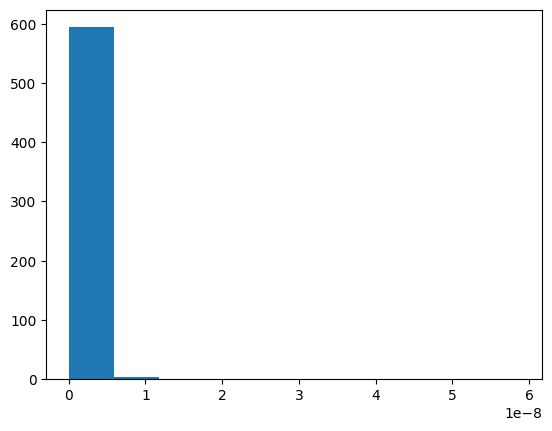

#########################################
Graph-SCP Time:  60.958099126815796
Random Time: 0 0 0
SCIP Time: 402.32508397102356
Greedy Time: 0.016653060913085938

Optimal Objective:  8
SCIP Objective:  8
Random Objective:  0 0 0

Gurobi Node Count :  161099
SCIP Node Count :  56953

Num Times Gurobi Run :  1
Problem Size :  120 / 350
#########################################
################################
#############1/5################
################################
Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600


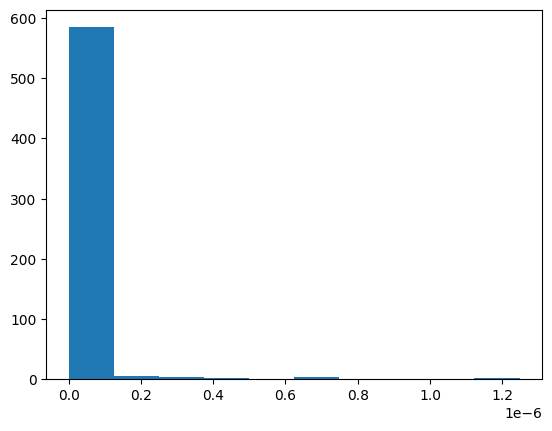

#########################################
Graph-SCP Time:  78.68448805809021
Random Time: 0 0 0
SCIP Time: 405.2833490371704
Greedy Time: 0.015041828155517578

Optimal Objective:  8
SCIP Objective:  8
Random Objective:  0 0 0

Gurobi Node Count :  174071
SCIP Node Count :  78675

Num Times Gurobi Run :  1
Problem Size :  120 / 350
#########################################
################################
#############2/5################
################################
Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600


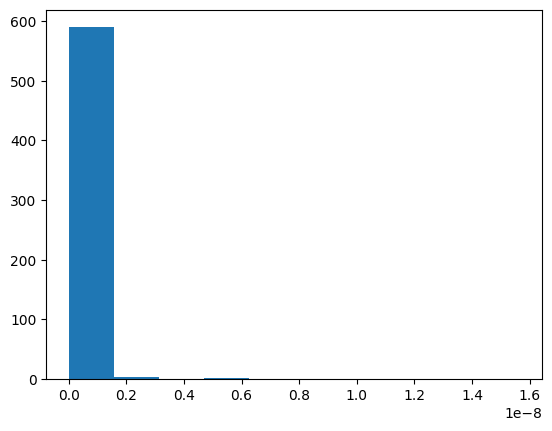

#########################################
Graph-SCP Time:  61.73687410354614
Random Time: 0 0 0
SCIP Time: 245.7735939025879
Greedy Time: 0.01677536964416504

Optimal Objective:  8
SCIP Objective:  8
Random Objective:  0 0 0

Gurobi Node Count :  108853
SCIP Node Count :  61510

Num Times Gurobi Run :  1
Problem Size :  120 / 350
#########################################
################################
#############3/5################
################################
Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600


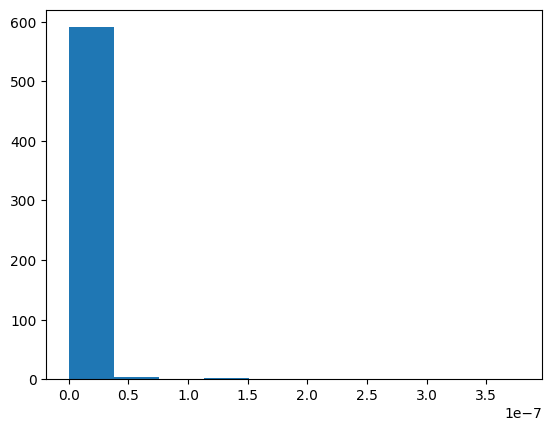

#########################################
Graph-SCP Time:  74.19945859909058
Random Time: 0 0 0
SCIP Time: 476.90465784072876
Greedy Time: 0.01551508903503418

Optimal Objective:  8
SCIP Objective:  8
Random Objective:  0 0 0

Gurobi Node Count :  197195
SCIP Node Count :  72563

Num Times Gurobi Run :  1
Problem Size :  120 / 350
#########################################
################################
#############4/5################
################################


In [17]:
results, inst = test_set_cover(test_instances = test_2[-5:],
                                 num_runs = 10,
                                 cost_type = 'equal',
                                 model_path = './models/set_cover_sage_hyp.pkl',
                                 m_type = 'sage',
                                 feats = ['costs', 'cover', 'ppr', 'bi_sf', 'hyp_feat'],
                                 init_sol_perc = 80,
                                 perc_start = 80,
                                 dec_size = 20, 
                                 obj_threshold = 1, 
                                 time_limit = 3600, 
                                 run_random = False, 
                                 gnn_solver = 'scip')

### Larger SCP instances using Gurobi 

Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600
Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 200 rows, 250 columns and 9693 nonzeros
Model fingerprint: 0x7e35746b
Variable types: 0 continuous, 250 integer (250 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 2054.0000000
Variable types: 0 continuous, 250 integer (250 binary)
Found heuristic solution: objective 1520.0000000

Root relaxation: objective 4.629387e+02, 214 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It

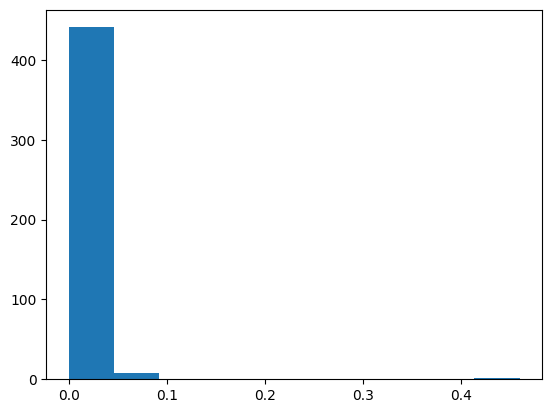

Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 200 rows, 33 columns and 2298 nonzeros
Model fingerprint: 0x8afe51ed
Variable types: 0 continuous, 33 integer (33 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded user MIP start with objective 3918

Variable types: 0 continuous, 33 integer (33 binary)
Found heuristic solution: objective 1058.0000000

Root relaxation: objective 5.299843e+02, 77 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  529.98428    0   27 1058.00000  529.98428  49.9%     -   


User-callback calls 7798, time in user-callback 0.01 sec
#########################################
Graph-SCP Time:  0.6832859516143799
Random Time: 0 0 0
Gurobi Time: 2.247
Greedy Time: 0.0016329288482666016

Optimal Objective:  753
Gurobi Objective:  753
Random Objective:  0 0 0

Gurobi Node Count :  12074.0
Gurobi Node Count :  3729.0

Num Times Gurobi Run :  2
Problem Size :  69 / 250
#########################################
################################
#############0/5################
################################
Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600
Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 200 rows, 250 columns and 10469 nonzeros
Model fingerprint: 0xed2a6546
Variable types: 0 continuous, 250 integer (250 binary)
Coeffici

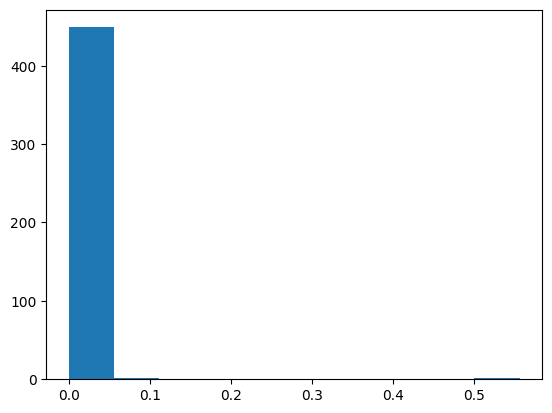

Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 200 rows, 43 columns and 2952 nonzeros
Model fingerprint: 0xfbd7a92a
Variable types: 0 continuous, 43 integer (43 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded user MIP start with objective 5207

Variable types: 0 continuous, 43 integer (43 binary)
Found heuristic solution: objective 1170.0000000

Root relaxation: objective 4.561715e+02, 85 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  456.17151    0   36 1170.00000  456.17151  61.0%     -   


Optimize a model with 200 rows, 250 columns and 9788 nonzeros
Model fingerprint: 0x23165593
Variable types: 0 continuous, 250 integer (250 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 1884.0000000
Variable types: 0 continuous, 250 integer (250 binary)
Found heuristic solution: objective 1641.0000000

Root relaxation: objective 4.794783e+02, 213 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  479.47832    0   67 1641.00000  479.47832  70.8%     -    0s
H    0     0                    1637.0000000  479.47832  70.7%     -    0s
H    0     0                    1270.0000000  479.47832  62.2%     -    0s
H    0     0                     930.0000000  479.47832  48.4%     -    0

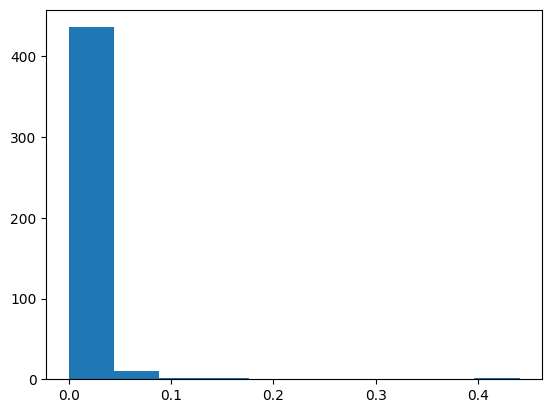

Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 200 rows, 36 columns and 2437 nonzeros
Model fingerprint: 0x6e082d81
Variable types: 0 continuous, 36 integer (36 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded user MIP start with objective 4354

Variable types: 0 continuous, 36 integer (36 binary)
Found heuristic solution: objective 1253.0000000

Root relaxation: objective 5.620801e+02, 80 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  562.08012    0   33 1253.00000  562.08012  55.1%     -   

H    0     0                    1271.0000000  470.49325  63.0%     -    0s
H    0     0                     839.0000000  470.49325  43.9%     -    0s
     0     0  487.61455    0   69  839.00000  487.61455  41.9%     -    0s
H    0     0                     793.0000000  487.61455  38.5%     -    0s
     0     0  490.73924    0   67  793.00000  490.73924  38.1%     -    0s
     0     0  490.73924    0   62  793.00000  490.73924  38.1%     -    0s
     0     0  490.73924    0   62  793.00000  490.73924  38.1%     -    0s
     0     0  490.73924    0   61  793.00000  490.73924  38.1%     -    0s
     0     0  490.73924    0   62  793.00000  490.73924  38.1%     -    0s
     0     0  490.73924    0   60  793.00000  490.73924  38.1%     -    0s
     0     0  490.73924    0   60  793.00000  490.73924  38.1%     -    0s
     0     0  490.73924    0   61  793.00000  490.73924  38.1%     -    0s
     0     0  490.73924    0   59  793.00000  490.73924  38.1%     -    0s
     0     0  500.60823  

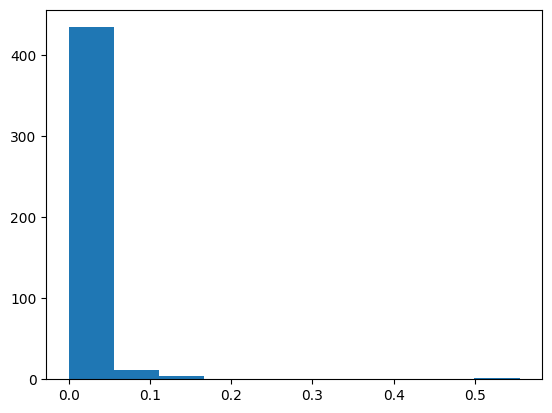

Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 200 rows, 46 columns and 3185 nonzeros
Model fingerprint: 0x5fe85150
Variable types: 0 continuous, 46 integer (46 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded user MIP start with objective 5621

Variable types: 0 continuous, 46 integer (46 binary)
Found heuristic solution: objective 1280.0000000

Root relaxation: objective 4.987697e+02, 101 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  498.76970    0   32 1280.00000  498.76970  61.0%     -  

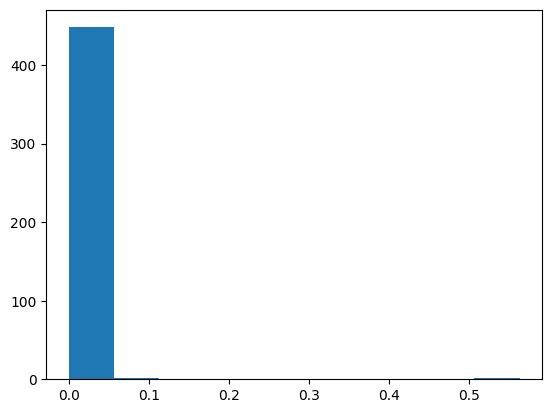

Set parameter Presolve to value 0
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 200 rows, 43 columns and 3008 nonzeros
Model fingerprint: 0xc36d6f82
Variable types: 0 continuous, 43 integer (43 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded user MIP start with objective 4959

Variable types: 0 continuous, 43 integer (43 binary)
Found heuristic solution: objective 1108.0000000

Root relaxation: objective 4.789561e+02, 93 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  478.95609    0   37 1108.00000  478.95609  56.8%     -   

In [16]:
results, inst = test_set_cover(test_instances = test_1[-5:],
                                 num_runs = 10,
                                 cost_type = 'custom',
                                 model_path = './models/set_cover_sage_hyp.pkl',
                                 m_type = 'sage',
                                 feats = ['costs', 'cover', 'ppr', 'bi_sf', 'hyp_feat'],
                                 init_sol_perc = 90,
                                 perc_start = 85,
                                 dec_size = 45, 
                                 obj_threshold = 1, 
                                 time_limit = 3600, 
                                 run_random = False, 
                                 gnn_solver = 'gurobi')